<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment05/20154652DJLee_assignment_05_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-01.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64
[[ 0.77431837 -0.70303407  0.        ]
 [ 0.94767429  0.22512402  0.        ]
 [ 1.10551762  0.21997798  0.        ]
 ...
 [ 2.13242214 -0.77048328  1.        ]
 [ 2.29978945  0.25990661  1.        ]
 [ 1.84806101 -0.48598075  1.        ]]


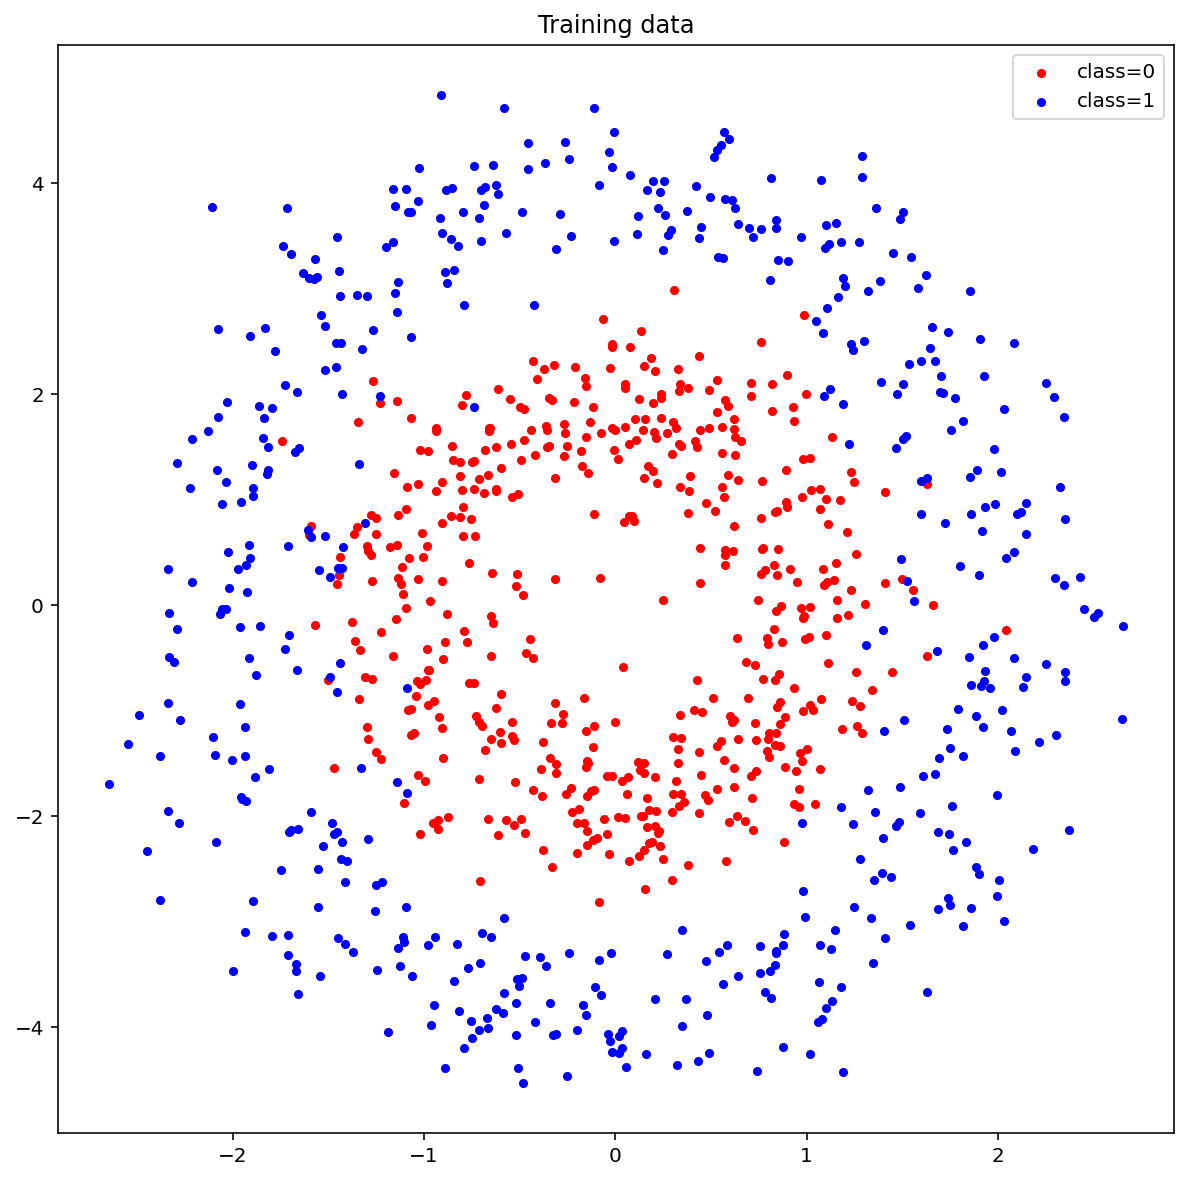

In [2]:
# import data with numpy
data = np.genfromtxt('dataset-a.txt', delimiter=',')[:,:]

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))
data[0][0] = 0.77431837
print(data)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0) # index of class0
idx_class1 = (idx==1)# index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()


## 2. Define a logistic regression loss function and its gradient
<hr>

In [3]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (np.dot(-y.T, np.log(y_pred)) - np.dot((1-y).T, np.log(1-y_pred))) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = np.dot(X.T, (y_pred - y)*2) / n
    return grad

# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):
    L_iters = np.zeros([max_iter]) # record the loss values 
    w_iters = np.zeros([max_iter,10]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, w) # linear predicition function
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss
        w = w - tau* grad_f # update rule of gradient descent
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w.reshape(1, len(w)) # save the current w value

    return w, L_iters, w_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


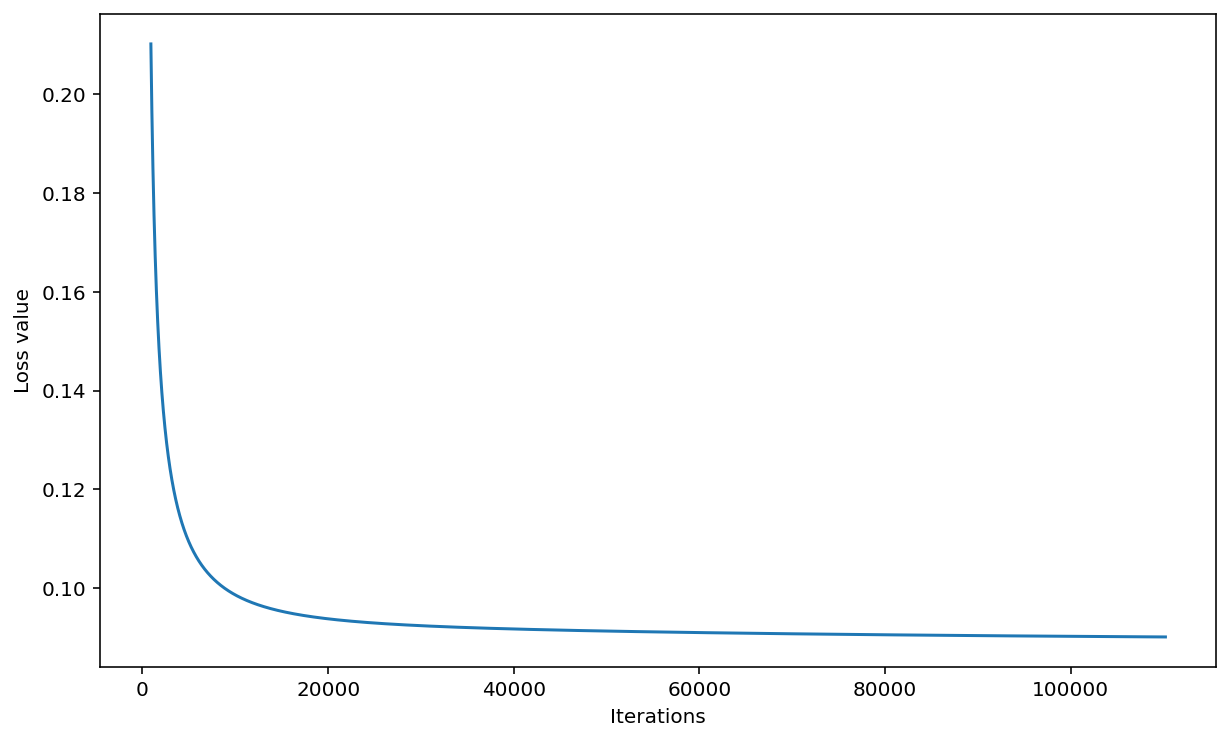

In [4]:
import math
# construct the data matrix X, and label vector y
n = data.shape[0]

X = np.ones([n,10])
X[:,0] = np.ones(n)
X[:,1] = np.cos(x1)
X[:,2] = np.sin(x1)
X[:,3] = np.multiply(x1, x2)
X[:,4] = np.square(x1)
X[:,5] = np.square(x2)
X[:,6] = np.cos(x2)
X[:,7] = np.sin(x2)
X[:,8] = np.multiply(np.square(x1), np.square(x2))
X[:,9] = np.multiply(np.power(x1, 3), np.power(x2, 3))

y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
w_init = np.array([1,1,1,1,1,1,1,1,1,1])[:,None]
tau = 1e-2; max_iter = 200000
w, L_iters, W_iters = grad_desc(X, y, w_init, tau, max_iter)

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [5]:
print(w)

[[-5.38203263]
 [-5.92358146]
 [ 0.01365014]
 [-0.18058702]
 [ 1.09582925]
 [ 1.53733863]
 [ 2.9537361 ]
 [-0.1449021 ]
 [ 0.25553966]
 [ 0.04131239]]


## 4. Plot the decision boundary
<hr>

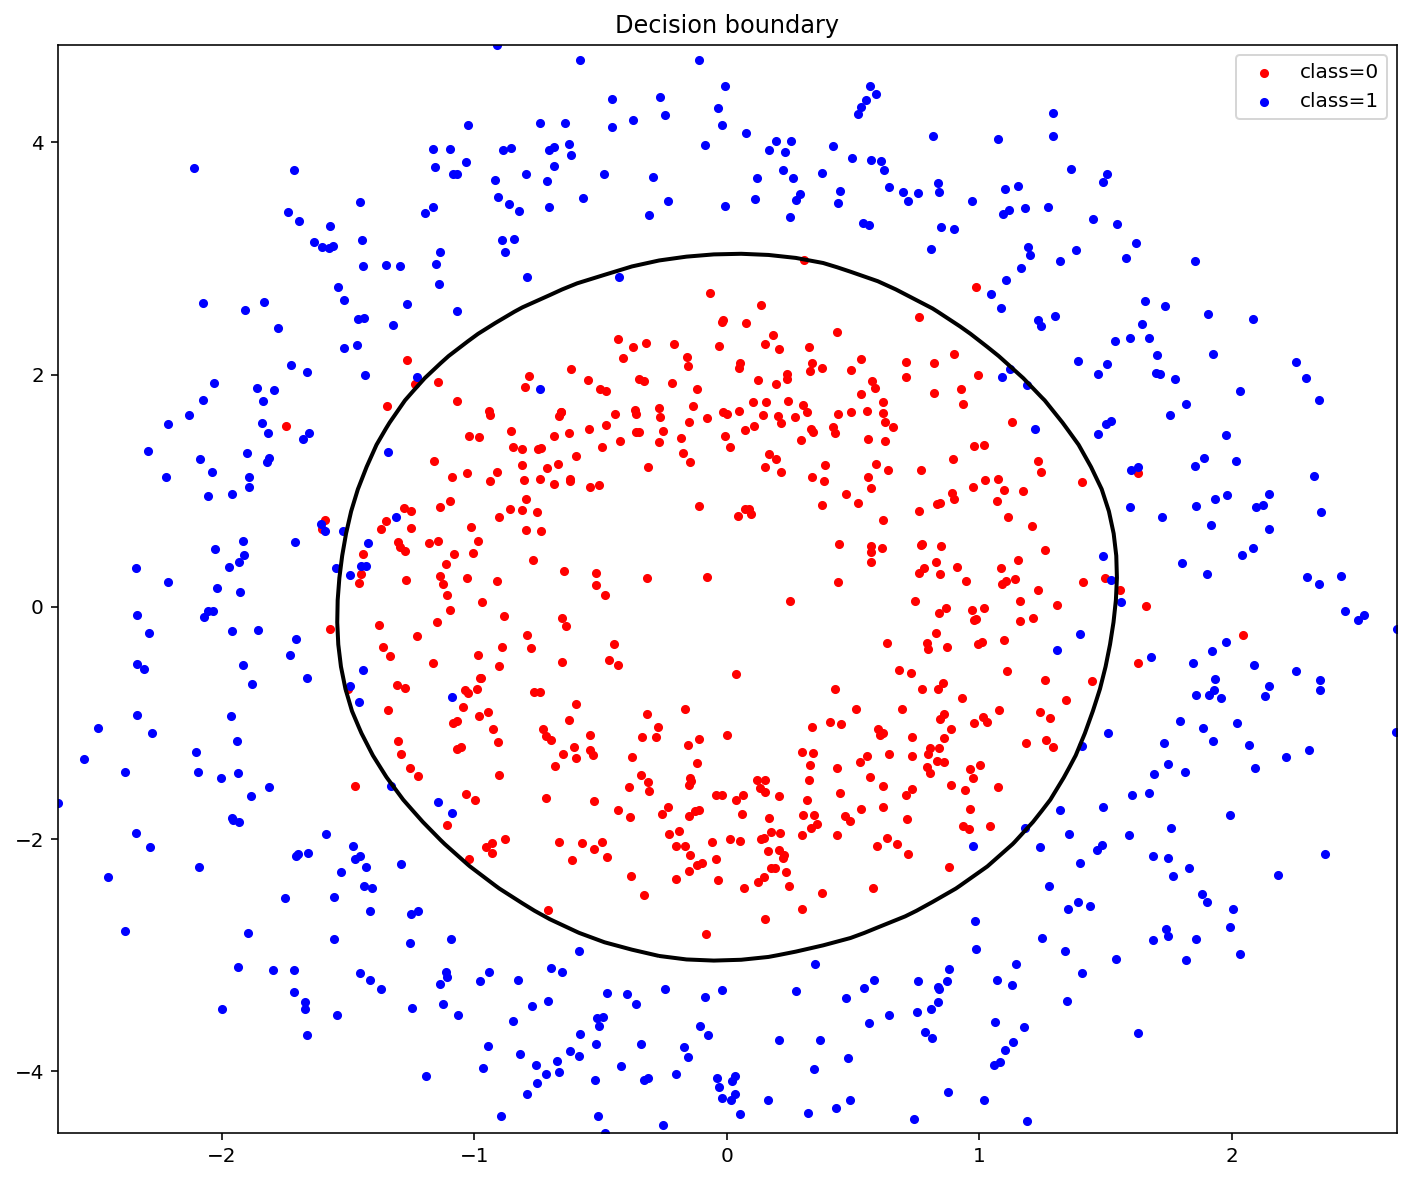

In [12]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = np.ones([np.prod(xx1.shape),10]) 

X2[:,0] = 1
X2[:,1] = np.cos(data1)
X2[:,2] = np.sin(data1)
X2[:,3] = np.multiply(data1, data2)
X2[:,4] = np.square(data1)
X2[:,5] = np.square(data2)
X2[:,6] = np.cos(data2)
X2[:,7] = np.sin(data2)
X2[:,8] = np.multiply(np.square(data1), np.square(data2))
X2[:,9] = np.multiply(np.power(data1, 3), np.power(data2, 3))

p = f_pred(X2, w)
p = p.reshape(xx1.shape[0], xx2.shape[0])

# plot
plt.figure(4,figsize=(12,10))


plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary')
plt.show()

## 5. Plot the probability map
<hr>

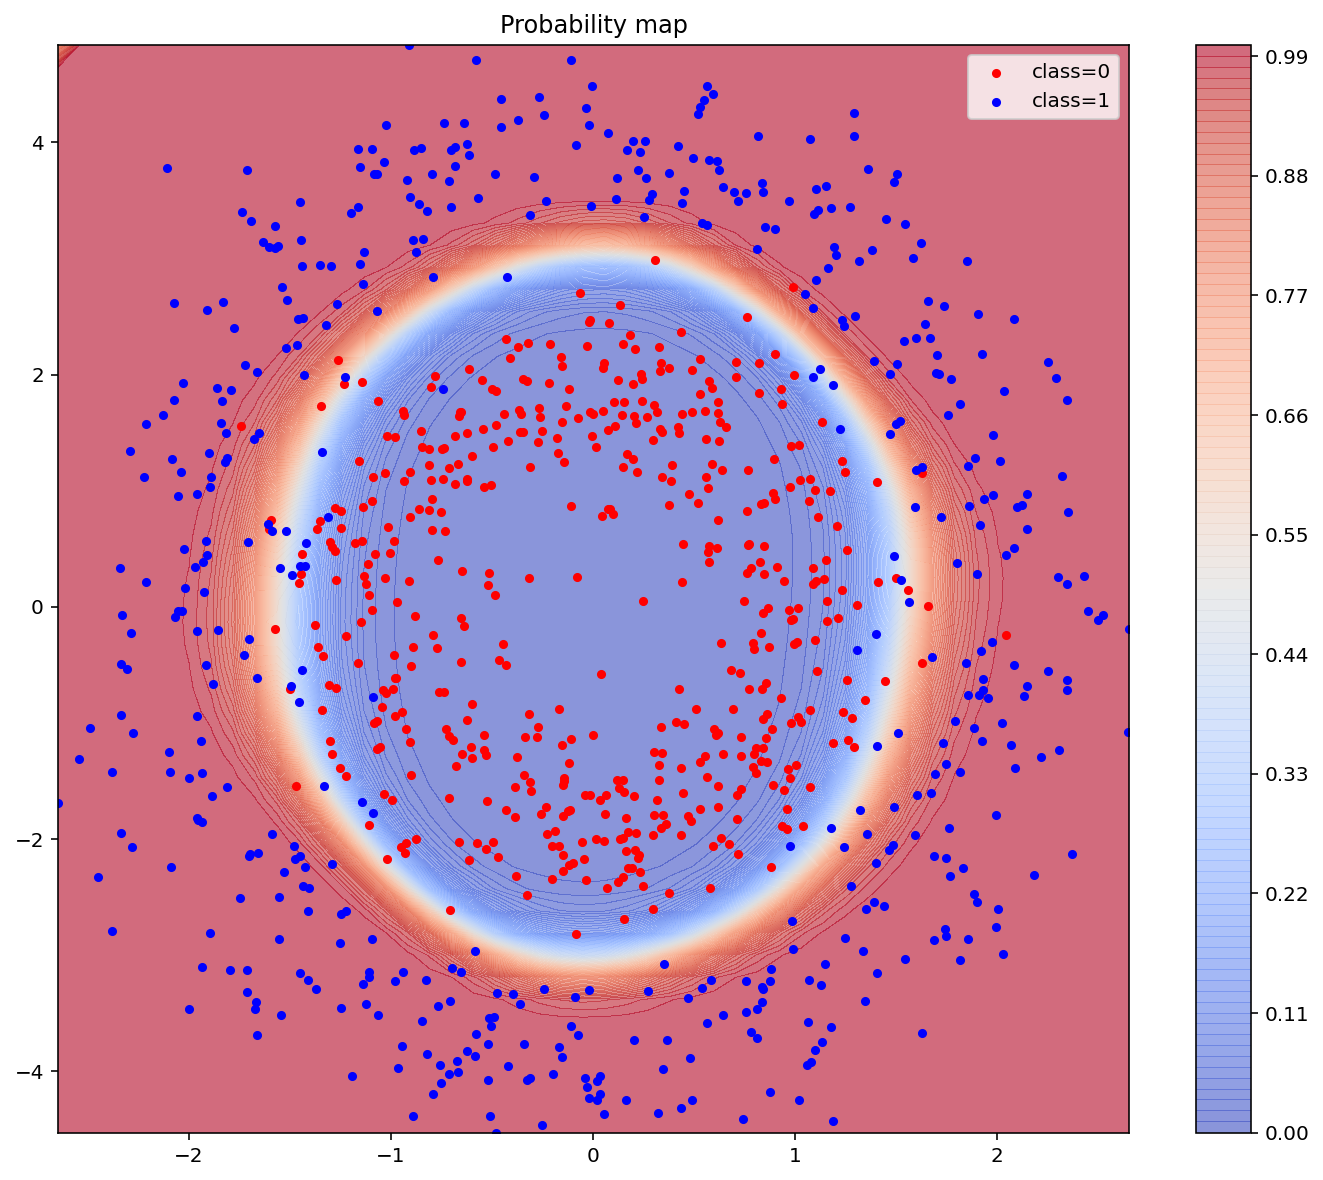

In [7]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X = np.ones([np.prod(xx1.shape),10]) 
X[:,0] = 1
X[:,1] = np.cos(data1)
X[:,2] = np.sin(data1)
X[:,3] = np.multiply(data1, data2)
X[:,4] = np.square(data1)
X[:,5] = np.square(data2)
X[:,6] = np.cos(data2)
X[:,7] = np.sin(data2)
X[:,8] = np.multiply(np.square(data1), np.square(data2))
X[:,9] = np.multiply(np.power(data1, 3), np.power(data2, 3))

# X2[:,0] = 1
# X2[:,1] = data1
# X2[:,2] = data2
# X2[:,3] = np.multiply(data1, data2)
# X2[:,4] = np.square(data1)
# X2[:,5] = np.square(data2)
# X2[:,6] = np.power(data1, 3)
# X2[:,7] = np.power(data2, 3)
# X2[:,8] = np.multiply(np.square(data1), np.square(data2))
# X2[:,9] = np.multiply(np.power(data1, 3), np.power(data2, 3))

p = f_pred(X, w)
p = p.reshape(xx1.shape[0], xx2.shape[0])

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.legend(loc=1)
plt.title('Probability map')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [8]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0) # index of class0
idx_class1 = (idx==1)# index of class1

X = np.ones([n,10])
X[:,0] = 1
X[:,1] = np.cos(x1)
X[:,2] = np.sin(x1)
X[:,3] = np.multiply(x1, x2)
X[:,4] = np.square(x1)
X[:,5] = np.square(x2)
X[:,6] = np.cos(x2)
X[:,7] = np.sin(x2)
X[:,8] = np.multiply(np.square(x1), np.square(x2))
X[:,9] = np.multiply(np.power(x1, 3), np.power(x2, 3))

p = f_pred(X, w)
pred = []
idx_wrong = 0
for i in p: #{
    if i>0.5:
      pred.append(1)
    else:
      pred.append(0)
#}
for i in range(len(pred)): #{
    if pred[i] != idx[i]: idx_wrong+=1  
#}
#print(idx_class1_label)
#print(idx_class1_pred)



#print(np.sum(idx_wrong))
print('total numver of data = ', n)
print('total number of correctly classified data = ', n-idx_wrong)
print('accuracy(%) = ',  ((n-idx_wrong)/n)*100)

total numver of data =  1000
total number of correctly classified data =  962
accuracy(%) =  96.2


## Output using the dataset (dataset-a.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

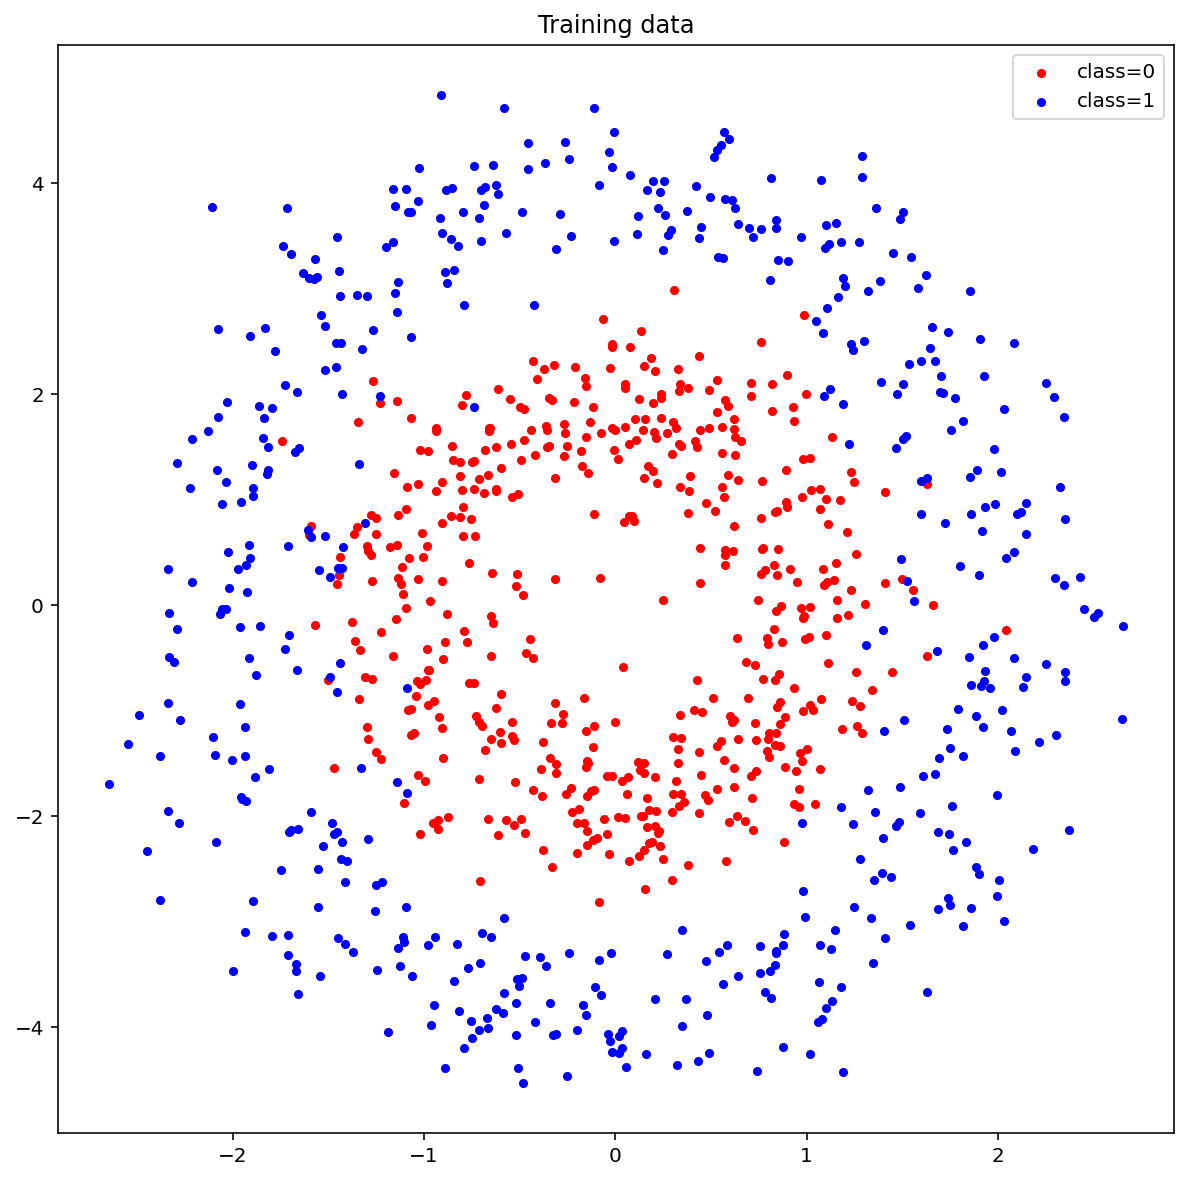

In [9]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

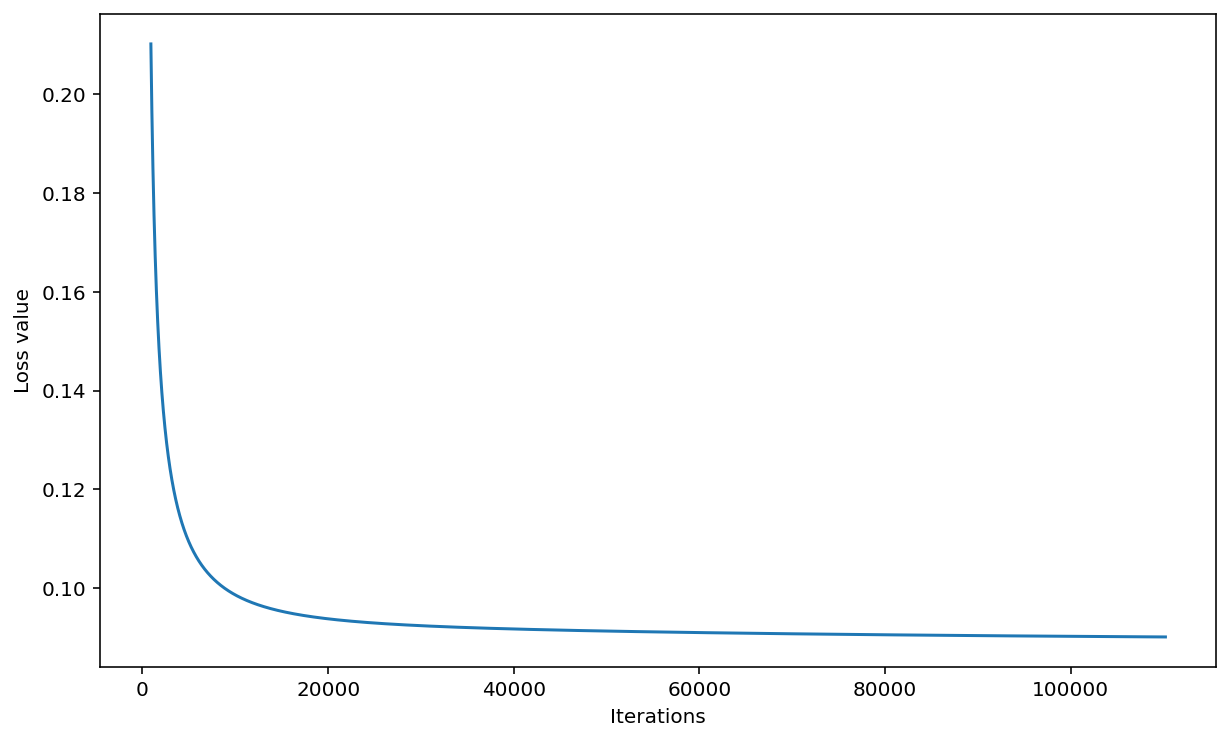

In [10]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decision boundary of the obtained classifier [2pt]
<hr>

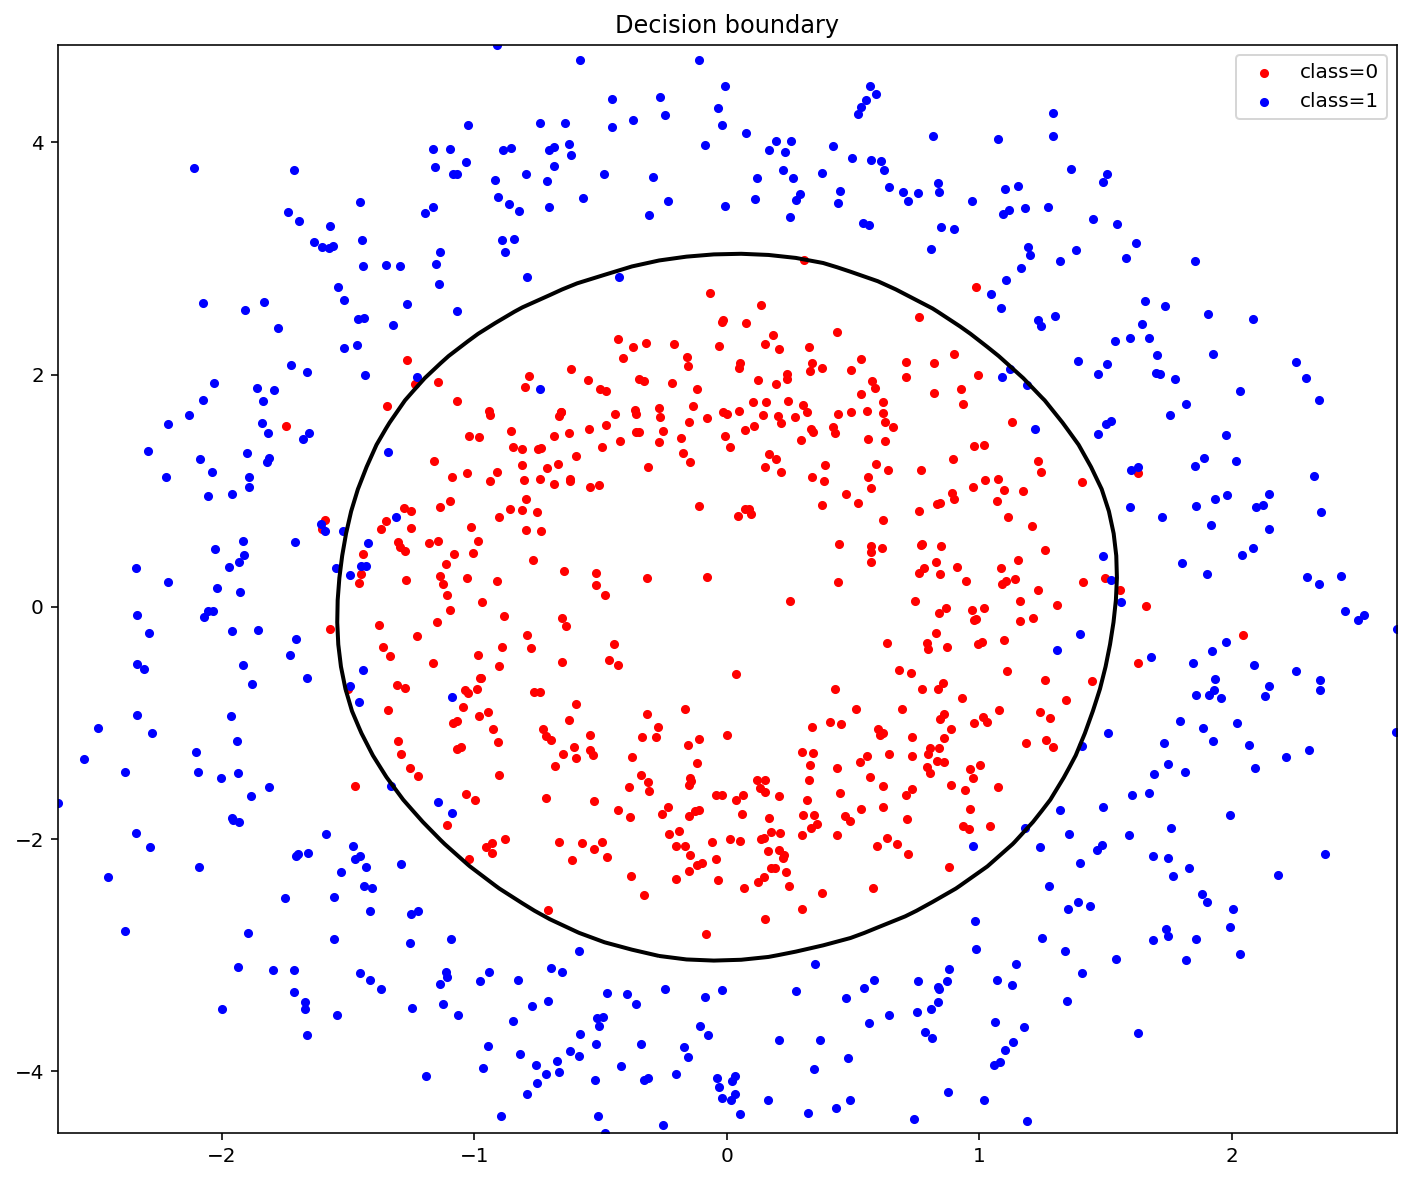

In [13]:
plt.figure(4,figsize=(12,10))


plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

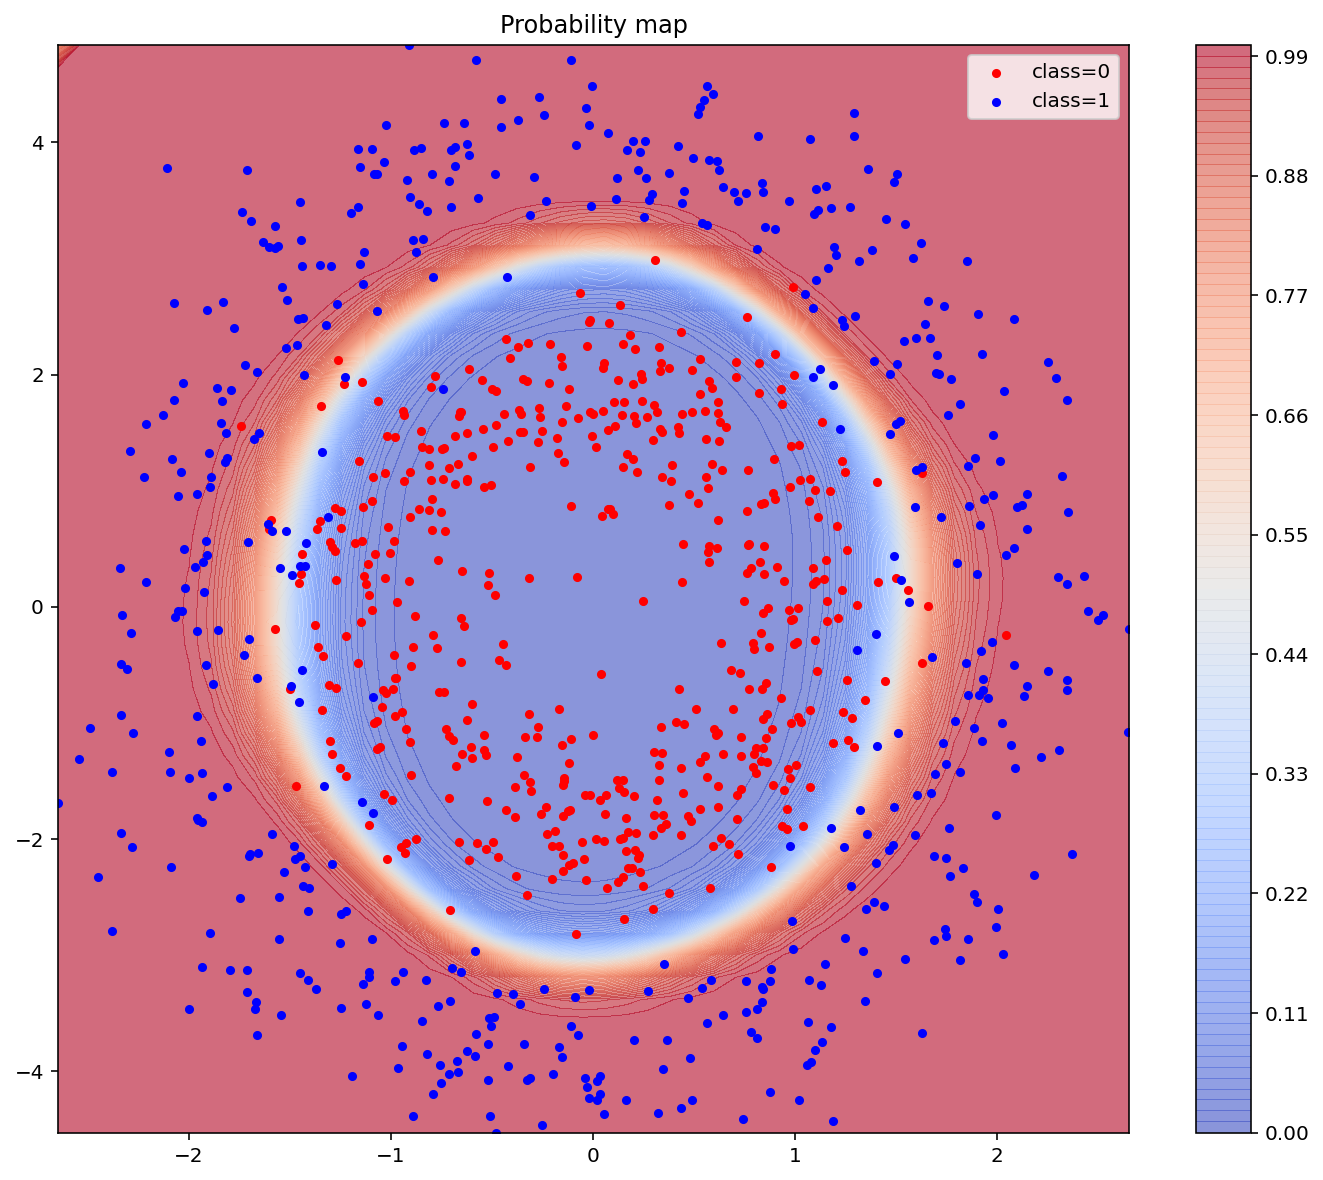

In [14]:
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.legend(loc=1)
plt.title('Probability map')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>